In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as linregress
import scipy.stats as st
import numpy as np


# File to Load (Remember to Change These)
bitcoin = "Resources/BTC-USD.csv"
NVDA = "Resources/NVDA.csv"

# Read Purchasing File and store into Pandas data frame
bitcoin_df = pd.read_csv(bitcoin)
print(bitcoin_df.head())
nvda_df = pd.read_csv(NVDA)
print(nvda_df.head())

         Date        Open        High         Low       Close   Adj Close  \
0  10/30/2016  714.117981  714.117981  696.474976  701.864014  701.864014   
1  10/31/2016  702.640015  709.289001  691.682007  700.971985  700.971985   
2   11/1/2016  701.336975  736.452026  701.336975  729.793030  729.793030   
3   11/2/2016  730.065979  740.828979  722.348999  740.828979  740.828979   
4   11/3/2016  742.346008  745.773010  678.156006  688.700012  688.700012   

        Volume  
0  100665000.0  
1   97064400.0  
2  130527000.0  
3   84865200.0  
4  172808000.0  
         Date       Open       High      Low      Close  Adj Close    Volume
0  10/31/2016  17.697500  17.907499  17.6875  17.790001  17.534466  25238800
1   11/1/2016  17.855000  17.952499  17.0725  17.262501  17.014545  47322400
2   11/2/2016  17.395000  17.629999  17.1600  17.190001  16.943089  29584800
3   11/3/2016  17.270000  17.285000  16.6600  16.990000  16.745955  30966400
4   11/4/2016  16.877501  17.182501  16.6450  16.8

In [17]:
bit_nvda_merge = pd.merge(nvda_df, bitcoin_df, how="inner", on="Date")
bit_nvda_merge = bit_nvda_merge.rename(columns={"Open_x":"NVDA Open","High_x":"NVDA High", "Low_x": "NVDA Low", "Close_x": "NVDA Close", "Adj Close_x":"NVDA Adj Close", "Volume_x":"NVDA Volume", "Open_y":"Bitcoin Open","High_y":"Bitcoin High", "Low_y": "Bitcoin Low", "Close_y": "Bitcoin Close", "Adj Close_y":"Bitcoin Adj Close", "Volume_y":"Bitcoin Volume"})
bit_nvda_merge = bit_nvda_merge.dropna()         

bit_nvda_merge["Date"] = pd.to_datetime(bit_nvda_merge["Date"]).dt.strftime('%Y-%m-%d')
bit_nvda_merge

,Date,NVDA Open,NVDA High,NVDA Low,NVDA Close,NVDA Adj Close,NVDA Volume,Bitcoin Open,Bitcoin High,Bitcoin Low,Bitcoin Close,Bitcoin Adj Close,Bitcoin Volume
0,2016-10-31,17.697500,17.907499,17.687500,17.790001,17.534466,25238800,702.640015,709.289001,691.682007,700.971985,700.971985,9.706440e+07
1,2016-11-01,17.855000,17.952499,17.072500,17.262501,17.014545,47322400,701.336975,736.452026,701.336975,729.793030,729.793030,1.305270e+08
2,2016-11-02,17.395000,17.629999,17.160000,17.190001,16.943089,29584800,730.065979,740.828979,722.348999,740.828979,740.828979,8.486520e+07
3,2016-11-03,17.270000,17.285000,16.660000,16.990000,16.745955,30966400,742.346008,745.773010,678.156006,688.700012,688.700012,1.728080e+08
4,2016-11-04,16.877501,17.182501,16.645000,16.892500,16.649858,32878000,689.124023,706.929993,685.562988,703.234985,703.234985,9.990770e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2021-10-25,229.729996,233.550003,227.699997,231.660004,231.660004,23023500,60893.925780,63729.324220,60691.800780,63039.824220,63039.824220,3.106491e+10
1255,2021-10-26,239.889999,252.589996,239.240005,247.169998,247.169998,48589800,63032.761720,63229.027340,59991.160160,60363.792970,60363.792970,3.487897e+10
1256,2021-10-27,244.740005,250.899994,242.820007,244.509995,244.509995,24599000,60352.000000,61435.183590,58208.187500,58482.386720,58482.386720,4.365708e+10
1257,2021-10-28,248.779999,249.500000,245.229996,249.410004,249.410004,23420400,58470.730470,62128.632810,58206.917970,60622.136720,60622.136720,4.525708e+10


In [18]:
bit_nvda_merge["Date"] = pd.to_datetime(bit_nvda_merge["Date"])

bins = [np.datetime64("2016-11-01"),np.datetime64("2017-01-01"),np.datetime64("2017-03-31"),
        np.datetime64("2017-06-30"),np.datetime64("2017-09-30"),np.datetime64("2017-12-31"),
        np.datetime64("2018-03-31"),np.datetime64("2018-06-30"),
       np.datetime64("2018-09-30"),np.datetime64("2018-12-31"),
        np.datetime64("2019-03-31"),np.datetime64("2019-06-30"),
       np.datetime64("2019-09-30"),np.datetime64("2019-12-31"),
        np.datetime64("2020-03-31"),np.datetime64("2020-06-30"),
       np.datetime64("2020-09-30"),np.datetime64("2020-12-31"),
        np.datetime64("2021-03-31"),np.datetime64("2021-06-30"),
       np.datetime64("2021-09-30"),np.datetime64("2021-10-31")
       ]

group_labels = ["Q4 2016", "Q1 2017", "Q2 2017", "Q3 2017", "Q4 2017",
               "Q1 2018", "Q2 2018", "Q3 2018", "Q4 2018",
               "Q1 2019", "Q2 2019", "Q3 2019", "Q4 2019",
               "Q1 2020", "Q2 2020", "Q3 2020", "Q4 2020",
               "Q1 2021", "Q2 2021", "Q3 2021", "Q4 2021"]

bit_nvda_merge["Quarters"] = pd.cut(bit_nvda_merge["Date"], bins, labels=group_labels)
bit_nvda_group = bit_nvda_merge.groupby("Quarters")

dates = bit_nvda_group["Date"]
close_price = bit_nvda_group["Bitcoin Close"]

# plt.figure(figsize=(20, 10))

# plt.plot(bins, close_price, color="green", label="Bitcoin Price")

# # plt.axvline(1/1/2018, ls='--')

# # plt.plot(xlabel="Date", ylabel="Price", grid=True)

# plt.legend(loc="best", fontsize=20)
# plt.title("Bitcoin Price", fontsize=20)
# plt.xlabel("Date", fontsize=20)
# plt.ylabel("Price", fontsize=20)

# plt.show()


# # dates = nvda_df["Date"]
# # close_price = nvda_df["Close"]

# # plt.plot(dates, close_price, color="green", label="NVDA Price")
# # plt.legend(loc="best")
# # plt.title("NVDA Price")
# # plt.xlabel("Date")
# # plt.ylabel("Price")
# # plt.show()

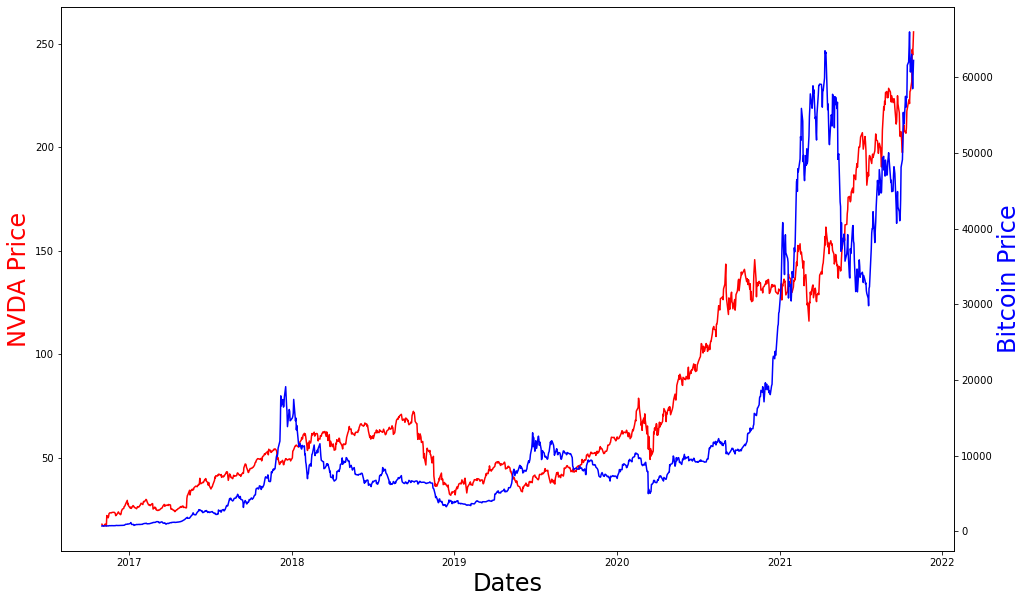

In [19]:
###### plotting both lines - Data with NVDA VS BITCOIN
nvdaclose_price = bit_nvda_merge["NVDA Close"]
bitclose_price = bit_nvda_merge["Bitcoin Close"]
dates = bit_nvda_merge["Date"]

# create figure and axis objects with subplots()
fig,ax = plt.subplots()

fig.set_figheight(10)
fig.set_figwidth(16)

# make a plot
ax.plot(dates, nvdaclose_price, color="red")
# set x-axis label
ax.set_xlabel("Dates",fontsize=24)

# set y-axis label
ax.set_ylabel("NVDA Price",color="red",fontsize=24)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(dates, bitclose_price,color="blue")
ax2.set_ylabel("Bitcoin Price",color="blue",fontsize=24)
plt.savefig("Output/fig_NVDA.png")
plt.show()
# save the plot as a file
fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

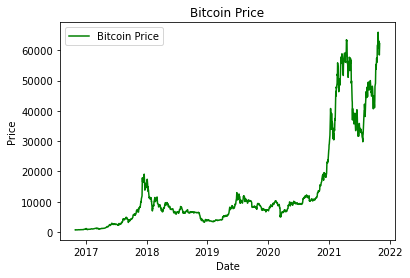

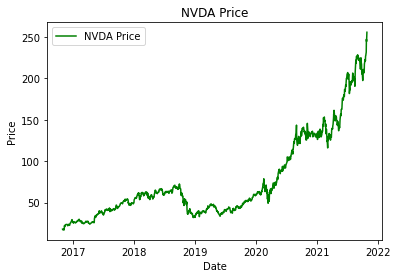

In [24]:
dates = bit_nvda_merge["Date"]
close_price = bit_nvda_merge["Bitcoin Close"]

plt.plot(dates, close_price, color="green", label="Bitcoin Price")
plt.legend(loc="best")
plt.title("Bitcoin Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.savefig("Output/fig_NVDA2.png")
plt.show()

dates = bit_nvda_merge["Date"]
close_price = bit_nvda_merge["NVDA Close"]

plt.plot(dates, close_price, color="green", label="NVDA Price")
plt.legend(loc="best")
plt.title("NVDA Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.savefig("Output/fig_NVDA3.png")
plt.show()

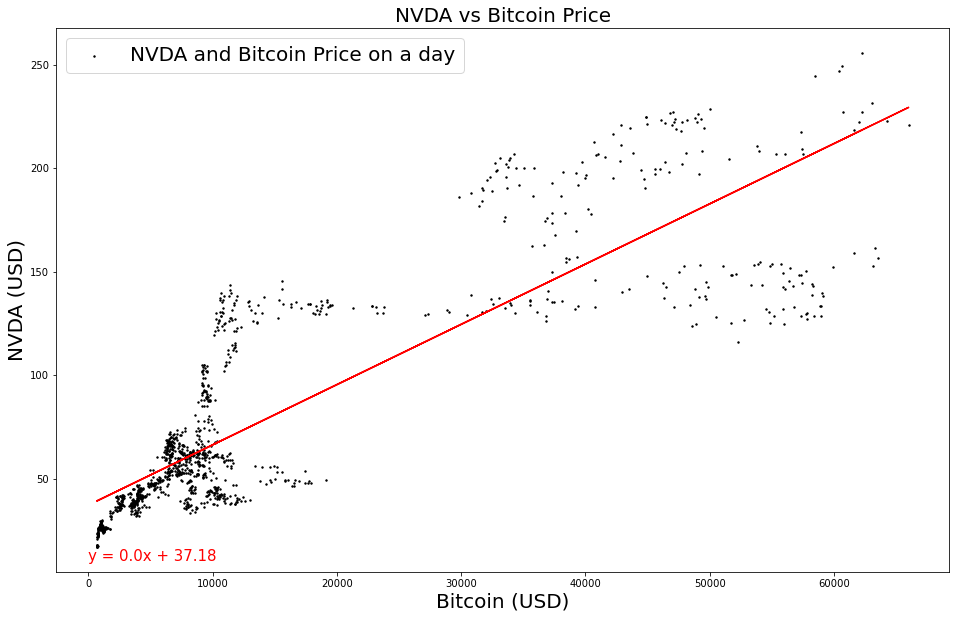

0.8564961607178572

In [25]:
## scatter plot of NVDA and Bitcoin
bit_close_price = bit_nvda_merge["Bitcoin Close"]
nvda_close_price = bit_nvda_merge["NVDA Close"]

plt.figure(figsize=(16, 10))

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(bit_close_price, nvda_close_price)
regress_values = slope * bit_close_price + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.scatter(bit_close_price, nvda_close_price, color="black", s=2, label="NVDA and Bitcoin Price on a day")
plt.plot(bit_close_price,regress_values,"r-")

plt.legend(loc="best", fontsize=20)
plt.title("NVDA vs Bitcoin Price", fontsize=20)
plt.xlabel("Bitcoin (USD)", fontsize=20)
plt.ylabel("NVDA (USD)", fontsize=20)

correlation = st.pearsonr(bit_close_price, nvda_close_price)
plt.savefig("Output/fig_NVDA4.png")
plt.show()
correlation[0]